In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
data = pd.read_csv('cyber_bullying.csv')
data.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


Data pre-processing

In [ ]:
#df=data.drop(columns=['ed_label_0','ed_label_1'])
df=data.drop(columns=['Date'])
df.head()

,index,oh_label,Text
0,0,1,"""You fuck your dad."""
1,1,0,"""i really don't understand your point.\xa0 It ..."
2,2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,"""listen if you dont wanna get married to a man..."
4,4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [ ]:
#df=data.drop(columns=['UserIndex','Number of Comments','Number of Subscribers','Membership Duration','Age','Number of Uploads','Profanity in UserID'])
#df.head()

In [ ]:
df['oh_label'].value_counts()

0    5993
1    2806
Name: oh_label, dtype: int64

In [ ]:
df['oh_label'].fillna(df['oh_label'].mean(), inplace=True)
df['oh_label'].value_counts()


0    5993
1    2806
Name: oh_label, dtype: int64

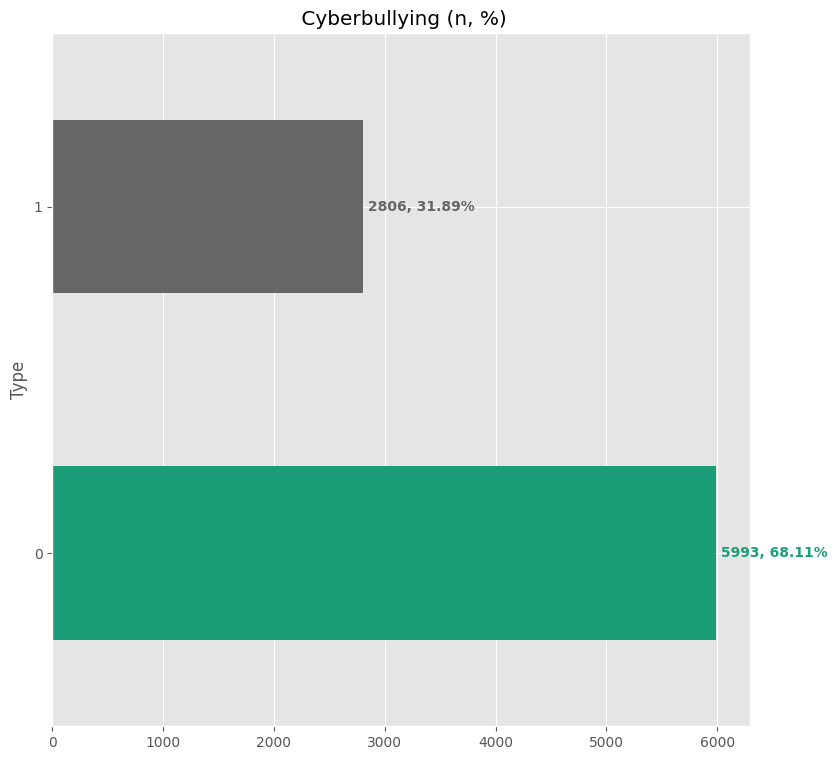

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df["oh_label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['oh_label'].value_counts().plot.barh(title=" Cyberbullying (n, %)",
                                                 ylabel="Type",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df['oh_label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%",
           color=c,
           va='center',
           fontweight='bold')

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Text'] = df['Text'].apply(preprocess_text)
df.head()


,index,oh_label,Text
0,0,1,fuck dad
1,1,0,really understand point xa0 seems mixing apple...
2,2,0,xc2 xa0majority canadians wrong n nunless supp...
3,3,0,listen dont wan na get married man women dont ...
4,4,0,c xe1c b u1ea1n xu u1ed1ng u0111 u01b0 u1eddng...


# TF_IDF

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['oh_label'], test_size=0.20, random_state=42)


In [ ]:
print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7039, 25170)
y_train shape: (7039,)
x_test shape: (1760, 25170)
y_test shape: (1760,)


# Random-Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7846590909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85      1178
           1       0.81      0.45      0.58       582

    accuracy                           0.78      1760
   macro avg       0.80      0.70      0.72      1760
weighted avg       0.79      0.78      0.76      1760



Text(50.722222222222214, 0.5, 'Actual')

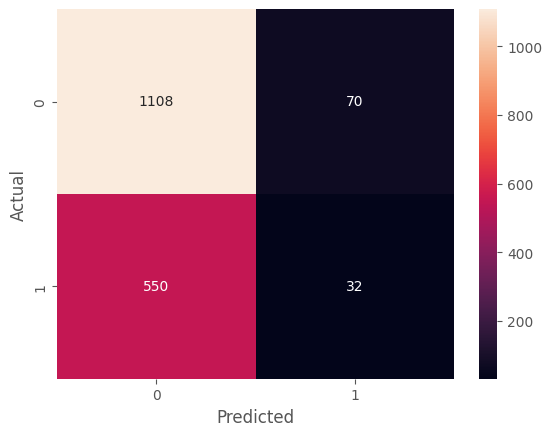

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.7238636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83      1178
           1       0.93      0.18      0.30       582

    accuracy                           0.72      1760
   macro avg       0.82      0.59      0.56      1760
weighted avg       0.78      0.72      0.65      1760



# KNN

In [ ]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6909090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81      1178
           1       0.95      0.07      0.13       582

    accuracy                           0.69      1760
   macro avg       0.82      0.53      0.47      1760
weighted avg       0.77      0.69      0.59      1760



# SVC

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7778409090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85      1178
           1       0.84      0.40      0.55       582

    accuracy                           0.78      1760
   macro avg       0.80      0.68      0.70      1760
weighted avg       0.79      0.78      0.75      1760



# AdaBoost

In [ ]:
adb_classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.25)
adb_classifier.fit(X_train, y_train)


y_pred = adb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7659090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.97      0.85      1178
           1       0.87      0.35      0.49       582

    accuracy                           0.77      1760
   macro avg       0.81      0.66      0.67      1760
weighted avg       0.79      0.77      0.73      1760



In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=200,learning_rate=0.25,max_depth=2, random_state=0)
gb_classifier.fit(X_train, y_train)


y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7806818181818181
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85      1178
           1       0.80      0.45      0.58       582

    accuracy                           0.78      1760
   macro avg       0.79      0.70      0.71      1760
weighted avg       0.78      0.78      0.76      1760



# Word2Vec

In [ ]:
!pip install gensim

In [ ]:
nltk.download('punkt')
df['tokenized_text'] = df['Text'].apply(lambda x: word_tokenize(x))
model = Word2Vec(sentences=df['tokenized_text'], vector_size=200, window=6, min_count=1, workers=4)
vector_of_word = model.wv['english']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def sentence_to_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)
df.loc[:, 'vectorized_text'] = df['tokenized_text'].apply(lambda x: sentence_to_vector(x, model))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
     df['vectorized_text'].to_list(),
     df['oh_label'],
    test_size=0.20,
    random_state=42
)

In [ ]:
x_train = np.vstack(x_train)
x_test = np.vstack(x_test)

# Random-Forest2

In [ ]:
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier2.fit(x_train, y_train)

y_pred = rf_classifier2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6926136363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      1178
           1       0.57      0.29      0.38       582

    accuracy                           0.69      1760
   macro avg       0.64      0.59      0.59      1760
weighted avg       0.67      0.69      0.66      1760



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

classifier2 = MultinomialNB()
classifier2.fit(x_train_scaled, y_train)

y_pred = classifier2.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.5886363636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68      1178
           1       0.39      0.43      0.41       582

    accuracy                           0.59      1760
   macro avg       0.55      0.55      0.55      1760
weighted avg       0.60      0.59      0.59      1760



# KNN

In [ ]:
knn_classifier2 = KNeighborsClassifier()

# Train the classifier
knn_classifier2.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier2.predict(x_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.5755681818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1178
           1       0.34      0.31      0.32       582

    accuracy                           0.58      1760
   macro avg       0.51      0.51      0.51      1760
weighted avg       0.56      0.58      0.57      1760



# SVC

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC()
classifier2.fit(x_train_scaled, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier2.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6693181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      1178
           1       0.00      0.00      0.00       582

    accuracy                           0.67      1760
   macro avg       0.33      0.50      0.40      1760
weighted avg       0.45      0.67      0.54      1760



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#AdaBoost

In [ ]:
adb_classifier2 = AdaBoostClassifier(n_estimators=200,learning_rate=0.5)
adb_classifier2.fit(x_train_scaled, y_train)


y_pred = adb_classifier2.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6477272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78      1178
           1       0.31      0.05      0.09       582

    accuracy                           0.65      1760
   macro avg       0.49      0.50      0.44      1760
weighted avg       0.55      0.65      0.55      1760

